<a href="https://colab.research.google.com/github/iznue/Mtvs/blob/main/practice13_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning with Python 
### 실습02.Classification Modeling

1. Load Data & Explore Data
2. Preprocess Data
3. Model Train
4. Model Test
5. Model Evaluate

In [4]:
# 1. Load Data & Explore Data
import pandas as pd

data = pd.read_csv('6강_데이터_Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15566689,Female,35.0,57000.0,0
1,15569641,Female,58.0,95000.0,1
2,15570769,Female,26.0,80000.0,0
3,15570932,Male,34.0,115000.0,0
4,15571059,Female,33.0,41000.0,0


In [5]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           394 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  388 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [6]:
# data describtion
data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,394,390.000000,388.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,202,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.782051,69628.865979,0.357500
std,7.165832e+04,NaN,10.452300,33889.337949,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,30.000000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,87250.000000,1.000000


In [7]:
# missing value 확인

data.isnull().sum()

User ID             0
Gender              6
Age                10
EstimatedSalary    12
Purchased           0
dtype: int64

In [8]:
# 2. Preprocess Data
# X/y feature selection
# 1. X = data[['Gender', 'Age', 'EstimatedSalary']] y = data['Purchased']

X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

print("X : ", X[:5])
print("y : ", y[:5])

X :     Gender   Age  EstimatedSalary
0  Female  35.0          57000.0
1  Female  58.0          95000.0
2  Female  26.0          80000.0
3    Male  34.0         115000.0
4  Female  33.0          41000.0
y :  0    0
1    1
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [9]:
# missing value 채우기 (numeric) -> age, EstimatedSalary

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 채워넣는 전략 : 평균
imputer.fit(X.iloc[:, 1:]) # gender만 제외한 나머지를 불러옴
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])  # 기존의 데이터를 transform함

X.isnull().sum()

Gender             6
Age                0
EstimatedSalary    0
dtype: int64

In [10]:
# missing value 채우기 (categorical) -> Gender

string_imputer = SimpleImputer(strategy='most_frequent') # 채워넣는 전략 : 최빈값 
X.iloc[:,0] = string_imputer.fit_transform(X.iloc[:,:1])

X.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
dtype: int64

In [11]:
# one hot encoding -> Gender

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')

X = ct.fit_transform(X)

print(X[:5])

[[1.00e+00 0.00e+00 3.50e+01 5.70e+04]
 [1.00e+00 0.00e+00 5.80e+01 9.50e+04]
 [1.00e+00 0.00e+00 2.60e+01 8.00e+04]
 [0.00e+00 1.00e+00 3.40e+01 1.15e+05]
 [1.00e+00 0.00e+00 3.30e+01 4.10e+04]]


In [12]:
# train test set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(80, 4)
(320, 4)
(80,)
(320,)


In [31]:
# feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # X_train 평균, 표준편차 구함
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5]) # 0에 가까운 값들로 변하는 것을 확인할 수 있음

[[-1.07128475  1.07128475  0.94451912 -0.84357642]
 [-1.07128475  1.07128475  0.24517775  0.21487646]
 [ 0.93345864 -0.93345864 -0.05453998 -0.42019527]
 [ 0.93345864 -0.93345864 -1.55312863 -0.23874621]
 [-1.07128475  1.07128475  0.04536593 -0.29922923]]


In [32]:
# 3. Model Train
# logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
# K-Nearest Neighbors (kNN)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [35]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=3)
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3)

In [36]:
# support vector machine (SVM) with lenear

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
# support vector macheine (SVM) with non-linear

from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

In [38]:
# 4. Model Test

y_pred_lr = lr.predict(X_test)
print(y_test.values) # actual data value
print(y_pred_lr) # model predict value

[0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0]
[0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 1]


In [39]:
y_pred_knn = knn.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rfm = rfm.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_svm_rbf = svm_rbf.predict(X_test)

In [40]:
import numpy as np

print('a, lr, knn, dtree, rfm, svm, rbf')
print(np.concatenate((y_test.values.reshape(len(y_test), 1),
                      y_pred_lr.reshape(len(y_pred_lr), 1),
                      y_pred_knn.reshape(len(y_pred_knn), 1),
                      y_pred_dtree.reshape(len(y_pred_dtree), 1),
                      y_pred_rfm.reshape(len(y_pred_rfm), 1),
                      y_pred_svm.reshape(len(y_pred_svm), 1),
                      y_pred_svm_rbf.reshape(len(y_pred_svm_rbf), 1)),1))

a, lr, knn, dtree, rfm, svm, rbf
[[0 0 0 0 0 0 0]
 [1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 0 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1]
 [1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0

In [41]:
# 5. Model Evaluate 

from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
print('ACC of lr : {:.2f}%'.format(acc_lr*100))

ACC of lr : 83.75%


In [42]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print('ACC of lr : {:.2f}%'.format(acc_lr*100))
acc_knn = accuracy_score(y_test, y_pred_knn)
print('ACC of knn : {:.2f}%'.format(acc_knn*100))
acc_dtree = accuracy_score(y_test, y_pred_dtree)
print('ACC of dtree : {:.2f}%'.format(acc_dtree*100))
acc_rfm = accuracy_score(y_test, y_pred_rfm)
print('ACC of rfm : {:.2f}%'.format(acc_rfm*100))
acc_svm = accuracy_score(y_test, y_pred_svm)
print('ACC of svm : {:.2f}%'.format(acc_svm*100))
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print('ACC of svm_rbf : {:.2f}%'.format(acc_svm_rbf*100))

ACC of lr : 83.75%
ACC of knn : 88.75%
ACC of dtree : 88.75%
ACC of rfm : 90.00%
ACC of svm : 82.50%
ACC of svm_rbf : 88.75%


In [43]:
# 학습 성능 높이기
# 어떻게? -> age와 salary의 값 차이가 큼 -> feature scaling (범위를 일정하게 맞춰줌)
# train test set split 과정 다음 feautre scaling 진행

# lr, knn, svm_rbf의 변화가 큼
# 따라서 lr, knn, svm_rbf가 데이터의 영향을 많이 받음을 알 수 있음
# dtree의 경우 데이터 크기의 영향을 받지 않음

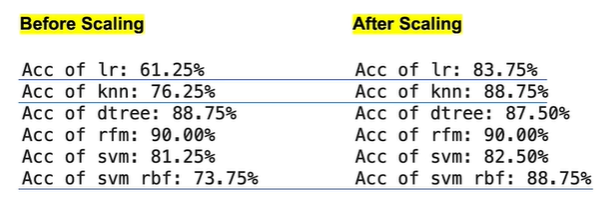